<a href="https://colab.research.google.com/github/niranjanbaviskar/-6Companies30days/blob/main/NYC_Taxi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings
import statsmodels.api as sn
warnings.filterwarnings('ignore')
%matplotlib inline


#Loading the Dataset

In [2]:
import pandas as pd
df = pd.read_csv("yellow_tripdata_2020-01.csv")

In [3]:
df_original = df.copy()

In [4]:
df.shape

(90631, 18)

In [5]:
df.head(8)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238.0,239.0,1.0,6.00,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239.0,238.0,1.0,7.00,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238.0,238.0,1.0,6.00,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238.0,151.0,1.0,5.50,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193.0,193.0,2.0,3.50,0.5,0.5,0.00,0.0,0.3,4.80,0.0
5,2,2020-01-01 00:09:44,2020-01-01 00:10:37,1.0,0.03,1.0,N,7.0,193.0,2.0,2.50,0.5,0.5,0.00,0.0,0.3,3.80,0.0
6,2,2020-01-01 00:39:25,2020-01-01 00:39:29,1.0,0.00,1.0,N,193.0,193.0,1.0,2.50,0.5,0.5,0.01,0.0,0.3,3.81,0.0
7,2,2019-12-18 15:27:49,2019-12-18 15:28:59,1.0,0.00,5.0,N,193.0,193.0,1.0,0.01,0.0,0.0,0.00,0.0,0.3,2.81,2.5


#Exploratory Data Analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90631 entries, 0 to 90630
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               90631 non-null  int64  
 1   tpep_pickup_datetime   90631 non-null  object 
 2   tpep_dropoff_datetime  90630 non-null  object 
 3   passenger_count        90630 non-null  float64
 4   trip_distance          90630 non-null  float64
 5   RatecodeID             90630 non-null  float64
 6   store_and_fwd_flag     90630 non-null  object 
 7   PULocationID           90630 non-null  float64
 8   DOLocationID           90630 non-null  float64
 9   payment_type           90630 non-null  float64
 10  fare_amount            90630 non-null  float64
 11  extra                  90630 non-null  float64
 12  mta_tax                90630 non-null  float64
 13  tip_amount             90630 non-null  float64
 14  tolls_amount           90630 non-null  float64
 15  im

In [7]:
df.dtypes

,0
VendorID,int64
tpep_pickup_datetime,object
tpep_dropoff_datetime,object
passenger_count,float64
trip_distance,float64
RatecodeID,float64
store_and_fwd_flag,object
PULocationID,float64
DOLocationID,float64
payment_type,float64


In [ ]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [ ]:
df['duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
df['duration']=df['duration'].dt.total_seconds()/60

In [ ]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1.0,6.00,3.00,0.5,1.47,0.00,0.3,11.27,2.5,4.800000
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1.0,7.00,3.00,0.5,1.50,0.00,0.3,12.30,2.5,7.416667
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1.0,6.00,3.00,0.5,1.00,0.00,0.3,10.80,2.5,6.183333
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1.0,5.50,0.50,0.5,1.36,0.00,0.3,8.16,0.0,4.850000
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,2.0,3.50,0.50,0.5,0.00,0.00,0.3,4.80,0.0,2.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6405003,NaN,2020-01-31 22:51:00,2020-01-31 23:22:00,NaN,3.24,NaN,NaN,237,234,NaN,17.59,2.75,0.5,0.00,0.00,0.3,21.14,0.0,31.000000
6405004,NaN,2020-01-31 22:10:00,2020-01-31 23:26:00,NaN,22.13,NaN,NaN,259,45,NaN,46.67,2.75,0.5,0.00,12.24,0.3,62.46,0.0,76.000000
6405005,NaN,2020-01-31 22:50:07,2020-01-31 23:17:57,NaN,10.51,NaN,NaN,137,169,NaN,48.85,2.75,0.0,0.00,0.00,0.3,51.90,0.0,27.833333
6405006,NaN,2020-01-31 22:25:53,2020-01-31 22:48:32,NaN,5.49,NaN,NaN,50,42,NaN,27.17,2.75,0.0,0.00,0.00,0.3,30.22,0.0,22.650000


In [ ]:
df = df[['passenger_count','payment_type','fare_amount','trip_distance','duration']]

In [ ]:
df.isnull().sum()

,0
passenger_count,65441
payment_type,65441
fare_amount,0
trip_distance,0
duration,0


In [ ]:
65441/len(df)*100

1.021716132126611

In [ ]:
df.dropna(inplace=True)

In [ ]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1.0,1.0,6.0,1.20,4.800000
1,1.0,1.0,7.0,1.20,7.416667
2,1.0,1.0,6.0,0.60,6.183333
3,1.0,1.0,5.5,0.80,4.850000
4,1.0,2.0,3.5,0.00,2.300000
...,...,...,...,...,...
6339562,1.0,1.0,11.0,2.10,14.233333
6339563,1.0,1.0,13.0,2.13,19.000000
6339564,1.0,1.0,12.5,2.55,16.283333
6339565,1.0,2.0,8.5,1.61,9.633333


In [ ]:
df['passenger_count'] = df['passenger_count'].astype('int64')
df['payment_type'] = df['payment_type'].astype('int64')

In [ ]:
df[df.duplicated()].select_dtypes(exclude=['datetime64[ns]']).sum()


,0
passenger_count,4022684.00
payment_type,4018601.00
fare_amount,26853721.53
trip_distance,4700899.61
duration,29066596.45


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(3007861, 5)

In [ ]:
df['passenger_count'].value_counts(normalize=True)

,proportion
passenger_count,
1,0.581981
2,0.190350
3,0.066360
5,0.062937
6,0.039272
4,0.036046
0,0.023033
7,0.000009
9,0.000006


In [ ]:
df['payment_type'].value_counts(normalize=True)

,proportion
payment_type,
1,6.782670e-01
2,3.075731e-01
3,8.721480e-03
4,5.438084e-03
5,3.324622e-07


**Data Overview**
For the analysis, we utilized the comprehensive dataset of NYC Taxi Trip records, used data cleaning and feature engineering procedures to concentrate solely on the relevant columns essential for our investigation.


*   passenger_count(1 to 5)
*   payment_type(card or cash)

*   fare_Amount
*  trip_distance (miles)

*   duartion(minutes)








In [ ]:
df=df[df['payment_type']<3]
df=df[(df['passenger_count']>0) & (df['passenger_count']<6)]

In [ ]:
df.shape

(2780283, 5)

In [ ]:
df['payment_type'].replace([1,2],['Card','Cash'],inplace=True)

In [ ]:
df.describe()

,passenger_count,fare_amount,trip_distance,duration
count,2.780283e+06,2.780283e+06,2.780283e+06,2.780283e+06
mean,1.733386e+00,1.780567e+01,4.536729e+00,2.415478e+01
std,1.176652e+00,1.506997e+01,4.895890e+00,9.260031e+01
min,1.000000e+00,-5.000000e+02,-2.218000e+01,-2.770367e+03
25%,1.000000e+00,9.000000e+00,1.500000e+00,9.883333e+00
50%,1.000000e+00,1.300000e+01,2.730000e+00,1.573333e+01
75%,2.000000e+00,2.100000e+01,5.470000e+00,2.336667e+01
max,5.000000e+00,4.265000e+03,2.628800e+02,8.525117e+03


In [ ]:
# remove negative values
df = df[df['fare_amount']>0]
df = df[df['trip_distance']>0]
df = df[df['duration']>0]

(array([2.748913e+06, 1.600000e+01, 1.000000e+00, 0.000000e+00,
        1.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 1.000000e+00]),
 array([1.000000e-02, 4.265090e+02, 8.530080e+02, 1.279507e+03,
        1.706006e+03, 2.132505e+03, 2.559004e+03, 2.985503e+03,
        3.412002e+03, 3.838501e+03, 4.265000e+03]),
 <BarContainer object of 10 artists>)

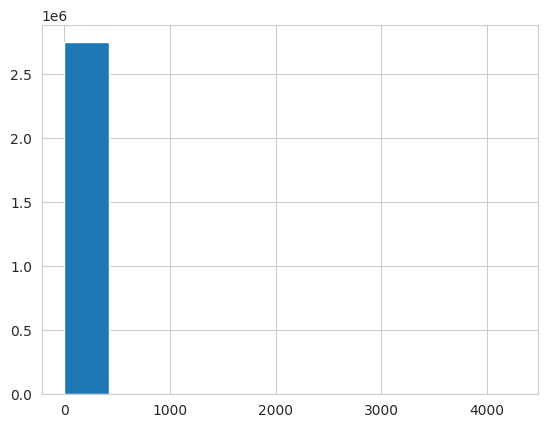

In [ ]:
# outliers
plt.hist(df['fare_amount'])

{'whiskers': [<matplotlib.lines.Line2D at 0x787769d7a190>,
 'caps': [<matplotlib.lines.Line2D at 0x787769d6ea50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7877433a5910>],
 'medians': [<matplotlib.lines.Line2D at 0x787769d886d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x787769d88f90>],
 'means': []}

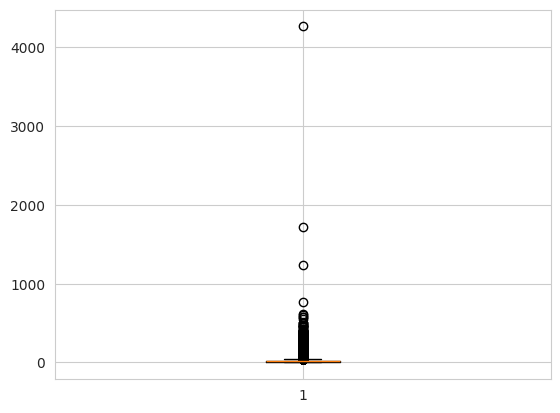

In [ ]:
plt.boxplot(df['fare_amount'])

In [ ]:
# removing outliers
for col in ['fare_amount','trip_distance','duration']:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  IQR = q3-q1

  lower_bound = q1-1.5*IQR
  upper_bound = q3+1.5*IQR

  df = df[(df[col]>=lower_bound) & (df[col]<=upper_bound)]


In [ ]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,Card,6.0,1.20,4.800000
1,1,Card,7.0,1.20,7.416667
2,1,Card,6.0,0.60,6.183333
3,1,Card,5.5,0.80,4.850000
5,1,Cash,2.5,0.03,0.883333
...,...,...,...,...,...
6339550,4,Card,10.5,2.40,12.383333
6339555,3,Card,10.0,2.09,14.800000
6339561,1,Card,17.5,4.11,21.500000
6339563,1,Card,13.0,2.13,19.000000


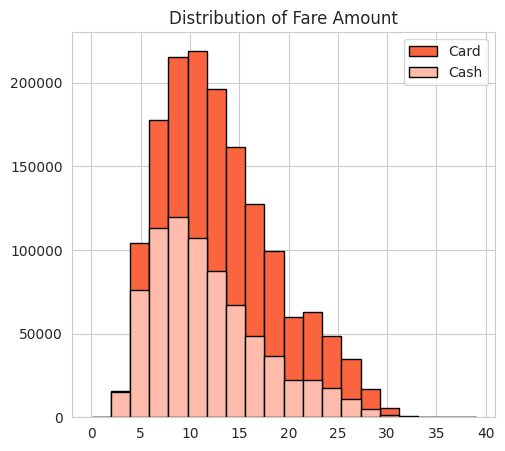

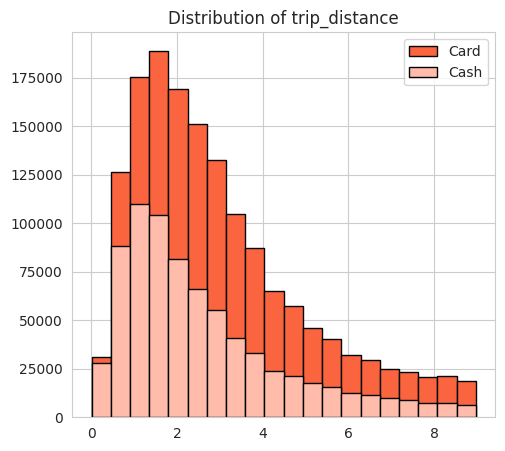

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Distribution of Fare Amount')
plt.hist(df[df['payment_type']=='Card']['fare_amount'],histtype='barstacked',bins=20,edgecolor = 'k',color = '#FA643F',label='Card')
plt.hist(df[df['payment_type']=='Cash']['fare_amount'],histtype='barstacked',bins=20,edgecolor = 'k',color = '#FFBCAB',label='Cash')
plt.legend()
plt.show()


plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Distribution of trip_distance')
plt.hist(df[df['payment_type']=='Card']['trip_distance'],histtype='barstacked',bins=20,edgecolor = 'k',color = '#FA643F',label='Card')
plt.hist(df[df['payment_type']=='Cash']['trip_distance'],histtype='barstacked',bins=20,edgecolor = 'k',color = '#FFBCAB',label='Cash')
plt.legend()
plt.show()

In [ ]:
df.groupby('payment_type').agg({'fare_amount':['mean','std'],'trip_distance':['mean','std']})

fare_amount           trip_distance         
                    mean       std          mean      std
payment_type                                             
Card           13.112493  5.849281      2.992237  1.99274
Cash           11.758005  5.613038      2.602207  1.91372

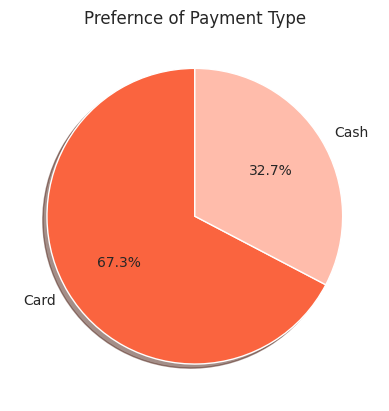

In [ ]:
plt.title('Prefernce of Payment Type')
plt.pie(df['payment_type'].value_counts(normalize=True),labels=df['payment_type'].value_counts().index,startangle=90,shadow=True,autopct='%1.1f%%',colors=['#FA643F','#FFBCAB'])
plt.show()

In [ ]:
passenger_count = df.groupby(['payment_type','passenger_count'])[['passenger_count']].count()
passenger_count.rename(columns={'passenger_count':'count'},inplace=True)
passenger_count.reset_index(inplace=True)

In [ ]:
passenger_count['perc'] = (passenger_count['count']/passenger_count['count'].sum())*100

In [ ]:
passenger_count

,payment_type,passenger_count,count,perc
0,Card,1,909245,39.568381
1,Card,2,327661,14.259100
2,Card,3,122412,5.327106
3,Card,4,63676,2.771042
4,Card,5,124045,5.398171
5,Cash,1,460550,20.042143
6,Cash,2,155472,6.765806
7,Cash,3,54506,2.371984
8,Cash,4,32715,1.423686
9,Cash,5,47626,2.072581


In [ ]:
data = pd.DataFrame(columns=['payment_type',1,2,3,4,5])
data['payment_type'] = ['Card','Cash']
data.iloc[0,1:] = passenger_count.iloc[0:5,-1]
data.iloc[1,1:] = passenger_count.iloc[5:,-1]
data

,payment_type,1,2,3,4,5
0,Card,39.568381,14.2591,5.327106,2.771042,5.398171
1,Cash,20.042143,6.765806,2.371984,1.423686,2.072581


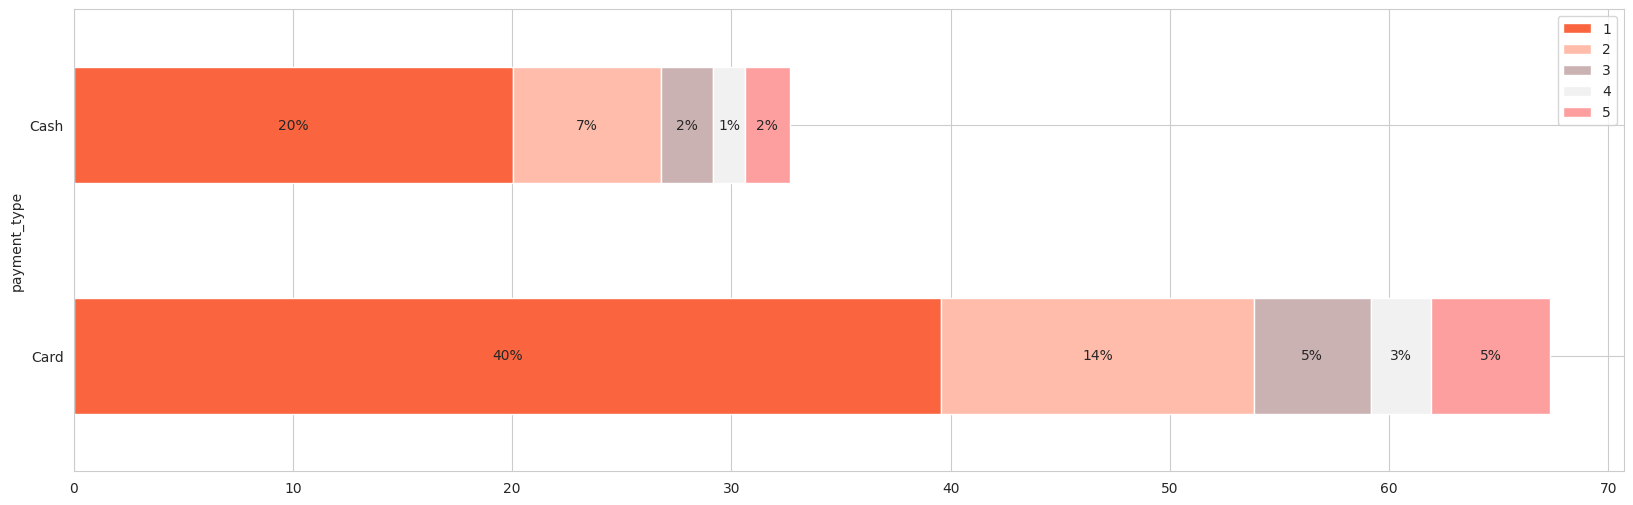

In [ ]:
fig,ax = plt.subplots(figsize=(20,6))
data.plot(x='payment_type',kind='barh',stacked = True,ax=ax,color=['#FA643F','#FFBCAB','#CBB2B2','#F1F1F1','#FD9F9F'])

#Add percentage text
for p in ax.patches:
  width = p.get_width()
  height = p.get_height()
  x,y = p.get_xy()
  ax.text(x+width/2,
          y+height/2,
          '{:.0f}%'.format(width),
          horizontalalignment = 'center',
          verticalalignment = 'center')

#Hypothesis Testing

**Null Hypothesis** : There is no difference in average fare between customers who use credit cards and customers who use cash.

H0: Card Users Fare = Cash Users Fare

**Alternative Hypothesis** : There is difference in average fare between customers who use credit cards and customers who use cash.

H1: Card Users Fare =/ Cash Users Fare



2 - Tailed t-test

We don't have population std therefore, we are using t-test

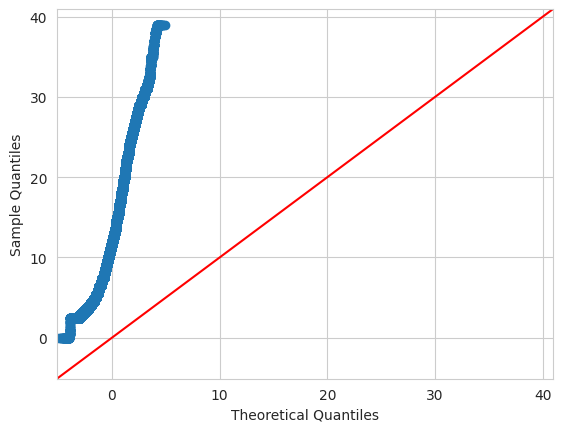

In [ ]:
sn.qqplot(df['fare_amount'],line='45')
plt.show()

In [ ]:
card_sample = df[df['payment_type']=='Card']['fare_amount']
cash_sample = df[df['payment_type']=='Cash']['fare_amount']

In [ ]:
t_stats,p_value = st.ttest_ind(a=card_sample,b=cash_sample,equal_var=False)
print('T statistic',t_stats,'p-value',p_value)

T statistic 169.2111527245052 p-value 0.0


As p-value < 0.05 , we reject the Null Hypothesis

**Methodology**

*   Descriptive Analysis : Performed statistical analysis to summarize key aspects of the data, focusing on fare amounts and payment types.
*   Hypothesis Testing : Conducted a T-test to evaluate the relationship between payment type and fare amount, testing the hypothesis that different payment methods influence fare amounts.



#Journey Insights


*   Customers paying with cards tend to have a slightly higher average trip distance and fare amount compared to those paying with cash
*   Indicates that customers prefers to pay more with cards they have high fare amount and long trip distance.

*  the proportion of customers paying with cards is significantly higher than those paying with cash, with card payment accounting for 67.5% of all transactions compared to cash payments at 32.5%
*   This indicates a strong preference among customers for using card payments over cash, potentially due to convenience, security, or incentive offered for card transactions.

*   Among card payments, rides with a single passenger(passenger_count = 1) comprise the largest proportion, constituting 40.08% of all transactions.

*  Similarly, cash payments are predominantly associated with single-passenger rides, making up 20.04% of all cash transactions.
*   There is a noticeable decrease in the percentage of transactions as the passenger count increase, suggesting that larger groups are less likely to use taxis or may opt fo alternative payment methods.


*   These insight emphasize the importance of considering both payment method and passenger count when analyzing transaction data, as they provide valuable insights into customer behaviour and prefernces.

*  With T-statistic of 169.21 and p-value of less than 0.05,we reject the null hypothesis, suggesting that there is indeed a significant difference in average fare between the two payment methods.

**Recommendations**


*   Encourage customers to pay with credit cards to capitalize on the potential for generating more revenue for taxi cab drivers.

*   Implement strategies such as offering incentives or discounts for credit card transactions to incentivize customers to choose this payment method.
*   Provide seamless and secure credt card payment options to enhance customer convenience and encourage adoption of this preferred payment method.












#Statistics

1. Conditional and Total Probabilities


*  Goal: We aim to compute the probability of different payment_type categories given that the trip_distance is below a certain threshold. This will help us understand how payment methods are associated with short trips.

*   Aim: We are analyzing how the probability of different payment methods (like cash, card, etc.) changes when the trip_distance is short.


*   Insight: If one payment type dominates in short trips, it can provide information about consumer behavior for specific trip lengths. For example, passengers might prefer cash for shorter trips due to quicker payments.


*   Expected Output: This will show the conditional probability distribution of payment methods for trips that are shorter than 2 miles.



In [ ]:
import pandas as pd

short_trips = df[df['trip_distance'] < 2]

total_short_trips = len(short_trips)

payment_type_prob = short_trips['payment_type'].value_counts() / total_short_trips
print("Conditional Probability of Payment Types for Short Trips:\n", payment_type_prob)


Conditional Probability of Payment Types for Short Trips:
 payment_type
Card    0.618761
Cash    0.381239
Name: count, dtype: float64


**Insights from the Conditional Probability:**

Payment Type 1 (likely Card): This has a high probability (73%), meaning that for short trips, most passengers are paying by cash or a similar method (if 1.0 corresponds to cash). This is intuitive, as passengers might prefer quick payment methods (like cash) for shorter trips, where they don’t need to wait for card processing.

Payment Type 2 (likely Cash): This shows a probability of 25%, suggesting that a quarter of short trips are paid for using a card. While cash is more frequent for short trips, a significant number of passengers still prefer to use their card.

2. Normal Distribution


*   Goal: We aim to see if the fare_amount follows a normal distribution, which is important for understanding if the pricing structure of trips is balanced or skewed

*   Aim: We are checking if fare_amount follows a normal distribution. Normal distribution is often assumed in pricing models because many real-world datasets tend to follow this pattern.
*   Insight: If the data fits a normal distribution, it confirms that fare prices are distributed in a typical manner, allowing us to make predictions and understand the expected pricing behavior.


*   Expected Output: A histogram of the fare amounts overlaid with a fitted normal distribution curve. This will show us how well fare amounts align with the normal distribution.



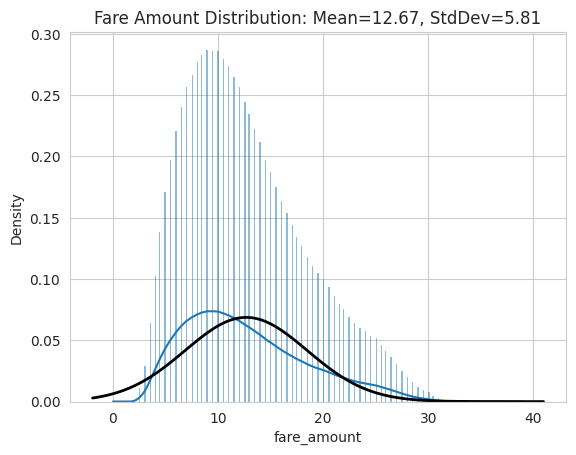

In [ ]:
from scipy.stats import norm
import seaborn as sns

mu, sigma = norm.fit(df['fare_amount'])

sns.histplot(df['fare_amount'], kde=True, stat="density", linewidth=0)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2)
plt.title(f'Fare Amount Distribution: Mean={mu:.2f}, StdDev={sigma:.2f}')
plt.show()


Output : This graph shows the distribution of fare amounts, with a mean of 12.67 and a standard deviation of 5.81. The data is highly concentrated around the mean, with very few instances deviating significantly. The presence of extreme values (outliers) may distort the scale, as most fares fall within a narrow range close to the mean. This suggests typical fares are low and consistent, with occasional unusually high values.

3. Central Limit Theorem


*   Goal: To demonstrate the Central Limit Theorem by drawing random samples from the dataset and showing that the distribution of the sample means approaches a normal distribution, even if the original population (in this case, fare_amount) is not normal.

*   Aim: The Central Limit Theorem (CLT) states that if we take many random samples from a population and calculate their means, the distribution of those means will approximate a normal distribution, even if the original data (like fare_amount) is not normal.
*   Insight: After generating multiple random samples from the fare_amount column and calculating their means, we can observe that the distribution of sample means becomes approximately normal, as predicted by the CLT. This is a key concept in inferential statistics, ensuring that sample means can be used for hypothesis testing and other statistical inference.


*   Expected Output: A histogram that shows the distribution of the sample means, which should look approximately normal.



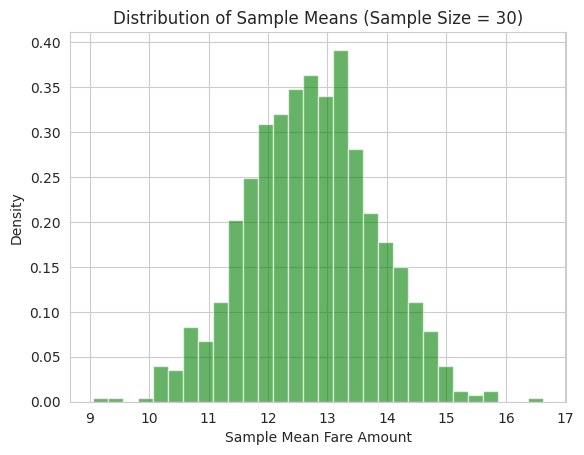

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

sample_means = []
sample_size = 30
n_samples = 1000

for _ in range(n_samples):
    sample = np.random.choice(df['fare_amount'], size=sample_size, replace=True)
    sample_means.append(np.mean(sample))

plt.hist(sample_means, bins=30, density=True, alpha=0.6, color='g')
plt.title(f'Distribution of Sample Means (Sample Size = {sample_size})')
plt.xlabel('Sample Mean Fare Amount')
plt.ylabel('Density')
plt.show()


Output : This histogram shows the distribution of sample means for a dataset, where each sample has a size of 30. The distribution is approximately normal (bell-shaped), reflecting the Central Limit Theorem, which states that the sampling distribution of the mean approaches normality as the sample size increases, regardless of the population's distribution. The x-axis represents the sample mean of the "fare amount," while the y-axis shows the density or frequency of occurrence of those means. Most sample means cluster around a central value, with fewer occurrences at the extremes.



**Spearman’s Rank Correlation**


*   Why use Spearman’s Rank Correlation: We use Spearman's rank correlation when the data does not meet the assumptions for Pearson's correlation (such as linearity or normality) or when we are dealing with ordinal data (ranked data). In this case, it's used to understand the monotonic relationship between fare_amount and trip_distance, which might not necessarily be linear but could still be correlated in a monotonic manner.List item

*   Interpretation of the result:


1.  If the Spearman correlation coefficient is close to +1, it suggests that as trip_distance increases, fare_amount also increases in a monotonic fashion.
2.  If the value is negative (close to -1), it suggests an inverse monotonic relationship.

3.   If the coefficient is around 0, it indicates that there's no clear monotonic relationship between the two variables.



*   P-value: The p-value indicates whether the correlation is statistically significant. A p-value less than 0.05 typically suggests that the correlation is statistically significant.
*   A Spearman's rank correlation of 0.879 suggests a strong positive monotonic relationship between fare_amount and trip_distance, meaning as the trip distance increases, the fare amount also increases in a consistent manner, though not necessarily linearly.










In [ ]:
from scipy.stats import spearmanr

spearman_corr, p_value = spearmanr(df['fare_amount'], df['trip_distance'])

print(f"Spearman's Rank Correlation: {spearman_corr}")
print(f"P-value: {p_value}")


Spearman's Rank Correlation: 0.9222606487951808
P-value: 0.0


Output : The Spearman's rank correlation coefficient of 0.90 between 'fare_amount' and 'trip_distance' indicates a strong, positive monotonic relationship between the two variables. This implies that as trip distance increases, 'fare_amount' tends to increase consistently. The p-value of 0.0 further supports this strong correlation, showing that the relationship is statistically significant.

In [ ]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,Card,6.0,1.20,4.800000
1,1,Card,7.0,1.20,7.416667
2,1,Card,6.0,0.60,6.183333
3,1,Card,5.5,0.80,4.850000
5,1,Cash,2.5,0.03,0.883333
...,...,...,...,...,...
6339550,4,Card,10.5,2.40,12.383333
6339555,3,Card,10.0,2.09,14.800000
6339561,1,Card,17.5,4.11,21.500000
6339563,1,Card,13.0,2.13,19.000000


#Model Building

In [ ]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,Card,6.0,1.20,4.800000
1,1,Card,7.0,1.20,7.416667
2,1,Card,6.0,0.60,6.183333
3,1,Card,5.5,0.80,4.850000
5,1,Cash,2.5,0.03,0.883333
...,...,...,...,...,...
6339550,4,Card,10.5,2.40,12.383333
6339555,3,Card,10.0,2.09,14.800000
6339561,1,Card,17.5,4.11,21.500000
6339563,1,Card,13.0,2.13,19.000000


In [ ]:
import pandas as pd

# payment_type ko encode karna without dropping any column
df = pd.get_dummies(df, columns=['payment_type'], drop_first=False)

# ab aap dekh sakte ho ki 'payment_type' ka encoding ho gaya hai
print(df.columns)


Index(['passenger_count', 'fare_amount', 'trip_distance', 'duration',
       'payment_type_Card', 'payment_type_Cash'],
      dtype='object')


In [ ]:
df

,passenger_count,fare_amount,trip_distance,duration,payment_type_Card,payment_type_Cash
0,1,6.0,1.20,4.800000,True,False
1,1,7.0,1.20,7.416667,True,False
2,1,6.0,0.60,6.183333,True,False
3,1,5.5,0.80,4.850000,True,False
5,1,2.5,0.03,0.883333,False,True
...,...,...,...,...,...,...
6339550,4,10.5,2.40,12.383333,True,False
6339555,3,10.0,2.09,14.800000,True,False
6339561,1,17.5,4.11,21.500000,True,False
6339563,1,13.0,2.13,19.000000,True,False


In [ ]:
X = df[['trip_distance', 'duration', 'passenger_count', 'payment_type_Card']]
y = df['fare_amount']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Model Evaluation
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


MAE: 0.44399672108217303
MSE: 0.6221457665616058
R² Score: 0.9816239780980179
